# Load datasets

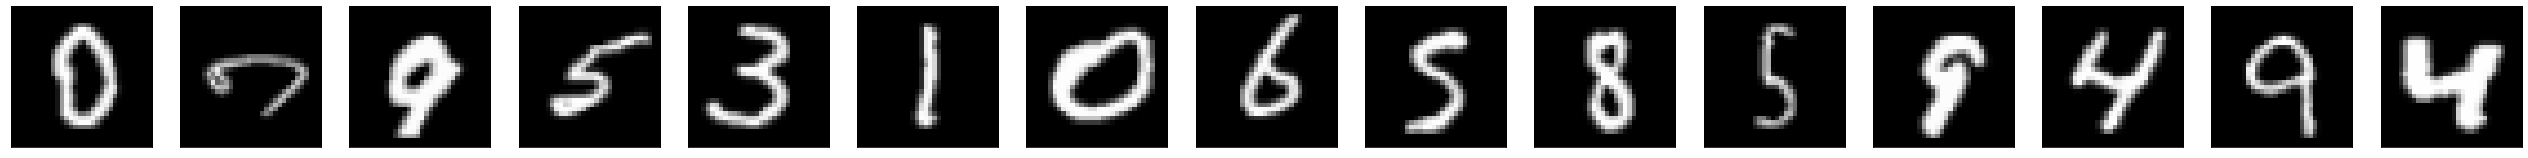

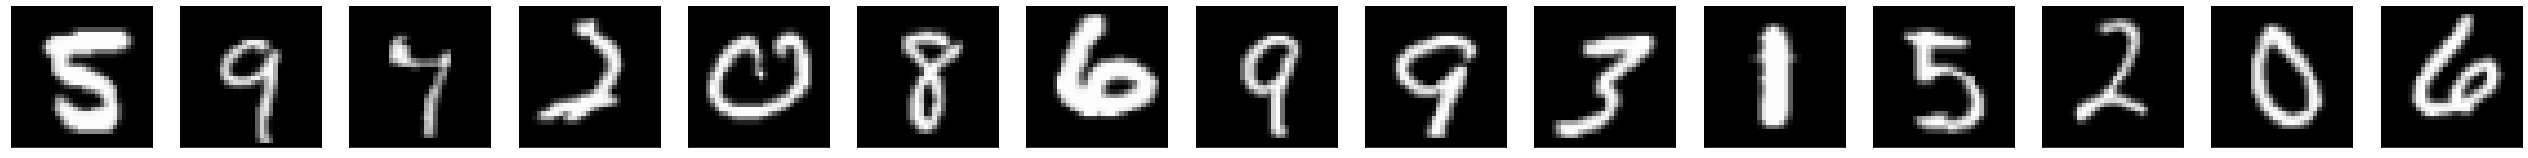

In [1]:
import tensorflow as tf
import numpy as np
import tqdm
import matplotlib.pyplot as plt

import styleloss
import FSHA
import architectures
import datasets
from datasets import *
from my_datasets import *


xpriv, xpub = load_mnist()

n = 15
x_priv = datasets.getImagesDS(xpriv, n)
x_pub = datasets.getImagesDS(xpub, n)

datasets.plot(x_priv)
datasets.plot(x_pub)

# Setup attack:

In [2]:
batch_size = 64
id_setup = 0
hparams = {
    'WGAN' : False,
    'gradient_penalty' : 50.,
    'style_loss' : 100,
    'lr_f' :  0.0001,
    'lr_tilde' : 0.0001,
    'lr_D' : 0.0001,
}

fsha = FSHA.FSHA(xpriv, xpub, id_setup, batch_size, hparams)

# Run attack:

In [ ]:
log_frequency = 500
LOG = fsha(100000, verbose=True, progress_bar=False, log_frequency=log_frequency)

RUNNING...
Regularize with style-loss
Use GP
Regularize with style-loss
Use GP
log--00%-0000000] validation: 5.3132
log--00%-0000500] validation: 3.7505
log--01%-0001000] validation: 2.2951
log--01%-0001500] validation: 2.1978
log--02%-0002000] validation: 2.1807
log--02%-0002500] validation: 2.1406
log--03%-0003000] validation: 2.2032
log--03%-0003500] validation: 2.0983
log--04%-0004000] validation: 2.1886
log--04%-0004500] validation: 2.1769
log--05%-0005000] validation: 2.2051
log--05%-0005500] validation: 2.1435
log--06%-0006000] validation: 2.1852
log--06%-0006500] validation: 2.1849
log--07%-0007000] validation: 2.1529
log--07%-0007500] validation: 2.1518
log--08%-0008000] validation: 2.0992
log--08%-0008500] validation: 2.0806
log--09%-0009000] validation: 2.0387
log--09%-0009500] validation: 2.0856
log--10%-0010000] validation: 2.0391
log--10%-0010500] validation: 2.1188
log--11%-0011000] validation: 2.0276
log--11%-0011500] validation: 2.0368
log--12%-0012000] validation: 1.9

# Plot logs:

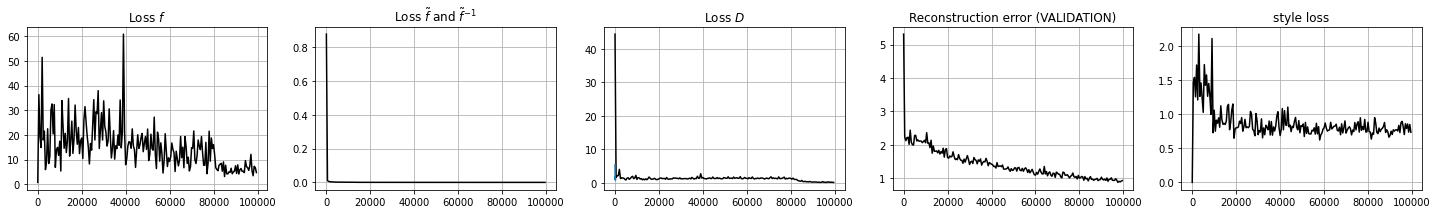

In [6]:
def plot_log(ax, x, y, label):
    ax.plot(x, y, color='black')
    ax.set(title=label)
    ax.grid()

if hparams.get('style_loss'):
    n = 5
else:
    n = 4
fix, ax = plt.subplots(1, n, figsize=(n*5, 3))
x = np.arange(0, len(LOG)) * log_frequency 

plot_log(ax[0], x, LOG[:, 0], label='Loss $f$')
plot_log(ax[1], x, LOG[:, 1],  label='Loss $\\tilde{f}$ and $\\tilde{f}^{-1}$')
plot_log(ax[2], x, LOG[:, 2],  label='Loss $D$')
plot_log(ax[3], x, LOG[:, 3],  label='Reconstruction error (VALIDATION)')

ax[2].plot(LOG[:, 3], label='validation')
if hparams.get('style_loss'):
    plot_log(ax[4], x, LOG[:, 4], label='style loss')


# Plot reconstruction private data:

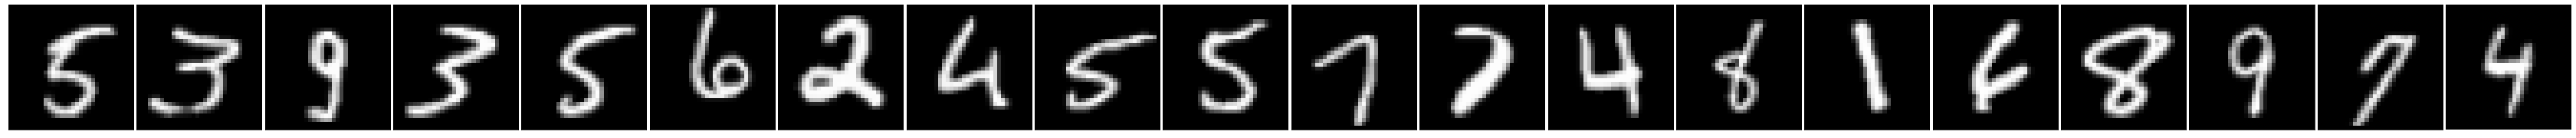

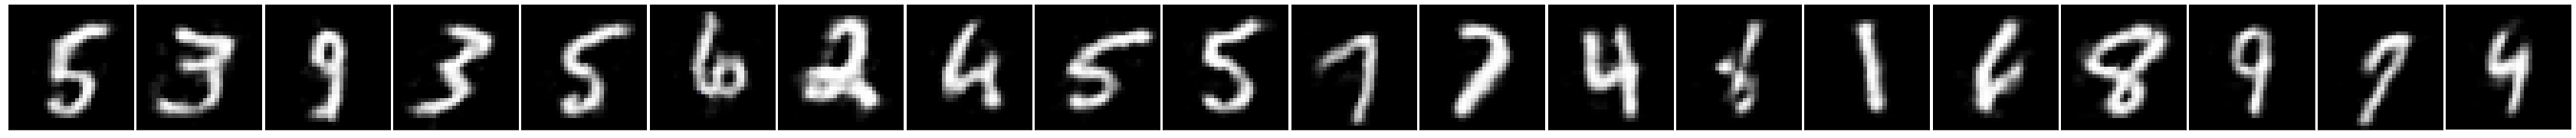

In [7]:
n = 20
X = getImagesDS(xpriv, n)
X_recovered, control = fsha.attack(X)

def plot(X):
    n = len(X)
    X = (X+1)/2
    fig, ax = plt.subplots(1, n, figsize=(n*3,3))
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.05)
    for i in range(n):
        ax[i].imshow((X[i]), cmap='inferno');  
        ax[i].set(xticks=[], yticks=[])
        ax[i].set_aspect('equal')
        
    return fig


fig = plot(X)
fig = plot(X_recovered)